## **한국어 기사 분석**

In [ ]:
import pandas as pd
import re

In [ ]:
# 데이터 불러오기
news_17 = pd.read_excel('2017_news.xlsx')
news_1819 = pd.read_excel('2018-2019_news.xlsx')
news_2023 = pd.read_excel('2020-2023_news.xlsx')
news_24 = pd.read_excel('2024_news.xlsx')

In [ ]:
combined_df = pd.concat([news_17, news_1819, news_2023, news_24], ignore_index=True)

In [ ]:
# 텍스트 전처리 함수
def clean_text(text):
    text = re.sub(r'\s+', ' ', text)  # 공백 제거
    text = re.sub(r'[^\w\s]', '', text)  # 특수문자 제거
    text = text.strip()  # 앞뒤 공백 제거
    return text

# 기사 내용 전처리
combined_df['cleaned_body'] = combined_df['body'].apply(clean_text)

In [ ]:
combined_df

,date,title,body,cleaned_body
0,2017-12-26,"LME 니켈 가격, 톤당 1만2천불 회복",12월 21일 LME 니켈 가격이 톤당 1만2천불을 회복하였음. 현물 가격이 11월...,12월 21일 LME 니켈 가격이 톤당 1만2천불을 회복하였음 현물 가격이 11월 ...
1,2017-12-22,"필리핀, 캐나다 지속가능 개발 벤치마킹",필리핀 광업협회 (The Chamber of Mines of the Philippi...,필리핀 광업협회 The Chamber of Mines of the Philippin...
2,2017-12-18,"Sherritt, Ambatovy 지분 축소 완료",캐나다 Sherritt International사는 마다가스카르 Ambatovy 니...,캐나다 Sherritt International사는 마다가스카르 Ambatovy 니...
3,2017-12-08,"LME 니켈 가격, 톤당 1만1천불 아래로 하락",LME 니켈 가격이 계속 하락하여 톤당 1만1천불 아래로 미끄러짐. 12월 5일 L...,LME 니켈 가격이 계속 하락하여 톤당 1만1천불 아래로 미끄러짐 12월 5일 LM...
4,2017-12-07,"SHFE 니켈 가격, 톤당 11,000불로 하락","상하이 선물 거래소 (Shanghai Futures Exchange, SHFE)에서...",상하이 선물 거래소 Shanghai Futures Exchange SHFE에서 니켈...
...,...,...,...,...
338,2024-02-07,"니켈, 인도네시아 증산 지속으로 가격 급락",니켈은 인도네시아의 증산에 따른 공급과잉으로 런던금속거래소(LME)의 니켈 가격이 ...,니켈은 인도네시아의 증산에 따른 공급과잉으로 런던금속거래소LME의 니켈 가격이 23...
339,2024-02-01,"IGO사, 서호주 Cosmos 니켈 프로젝트 조업중단",호주 광산업체 IGO Ltd사는 서호주 Cosmos 니켈 프로젝트를 유지보수 상태로...,호주 광산업체 IGO Ltd사는 서호주 Cosmos 니켈 프로젝트를 유지보수 상태로...
340,2024-01-24,"니켈, 연이은 조업중단 불구 가격 하락세 지속",1월 22일 런던금속거래소(LME)의 니켈 가격은 니켈 광산들의 연이은 조업중단에도...,1월 22일 런던금속거래소LME의 니켈 가격은 니켈 광산들의 연이은 조업중단에도 불...
341,2024-01-17,"First Quantum사, 서호주 Ravensthorpe 니켈 광산 조업 중단",캐나다 광산업체 First Quantum Minerals사는 니켈 가격 약세 속 서...,캐나다 광산업체 First Quantum Minerals사는 니켈 가격 약세 속 서...


In [ ]:
# !pip install transformers
# !pip install torch



In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification, pipeline

# 사전 훈련된 한국어 BERT 모델 로드
model_name = "kykim/bert-kor-base"
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=3)

# 감정 분석 파이프라인 로드
sentiment_pipeline = pipeline('sentiment-analysis', model=model, tokenizer=tokenizer)

# 감정 분석 수행
def get_sentiment(text):
    result = sentiment_pipeline(text)[0]
    if result['label'] == 'LABEL_0':
        return 'NEGATIVE'
    elif result['label'] == 'LABEL_1':
        return 'NEUTRAL'
    else:
        return 'POSITIVE'

combined_df['sentiment'] = combined_df['cleaned_body'].apply(get_sentiment)

# 결과 출력
# print(df[['Title', 'Date', 'sentiment']].head())


pytorch_model.bin:   0%|          | 0.00/476M [00:00<?, ?B/s]

c:\Users\user\miniconda3\envs\nltk_setting\lib\site-packages\huggingface_hub\file_download.py:157: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\user\.cache\huggingface\hub\models--kykim--bert-kor-base. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at kykim/b

In [ ]:
# 결과 출력
combined_df.head()

,date,title,body,cleaned_body,sentiment
0,2017-12-26,"LME 니켈 가격, 톤당 1만2천불 회복",12월 21일 LME 니켈 가격이 톤당 1만2천불을 회복하였음. 현물 가격이 11월...,12월 21일 LME 니켈 가격이 톤당 1만2천불을 회복하였음 현물 가격이 11월 ...,NEUTRAL
1,2017-12-22,"필리핀, 캐나다 지속가능 개발 벤치마킹",필리핀 광업협회 (The Chamber of Mines of the Philippi...,필리핀 광업협회 The Chamber of Mines of the Philippin...,POSITIVE
2,2017-12-18,"Sherritt, Ambatovy 지분 축소 완료",캐나다 Sherritt International사는 마다가스카르 Ambatovy 니...,캐나다 Sherritt International사는 마다가스카르 Ambatovy 니...,POSITIVE
3,2017-12-08,"LME 니켈 가격, 톤당 1만1천불 아래로 하락",LME 니켈 가격이 계속 하락하여 톤당 1만1천불 아래로 미끄러짐. 12월 5일 L...,LME 니켈 가격이 계속 하락하여 톤당 1만1천불 아래로 미끄러짐 12월 5일 LM...,NEUTRAL
4,2017-12-07,"SHFE 니켈 가격, 톤당 11,000불로 하락","상하이 선물 거래소 (Shanghai Futures Exchange, SHFE)에서...",상하이 선물 거래소 Shanghai Futures Exchange SHFE에서 니켈...,NEUTRAL


In [ ]:
# 엑셀 파일로 저장
combined_df.to_excel('sentiment_analysis_results.xlsx', index=False)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
len(combined_df[combined_df['sentiment']=='NEUTRAL'])

202

In [ ]:
len(combined_df[combined_df['sentiment']=='POSITIVE'])

119

In [ ]:
len(combined_df[combined_df['sentiment']=='NEGATIVE'])

22

In [ ]:
## 2022년에 부정적인 기사가 많았을까?

len(combined_df[(combined_df['sentiment']=='NEGATIVE')&(combined_df['date']>='2022-01-01')&(combined_df['date']<='2022-12-31')])

1

In [ ]:
len(combined_df[(combined_df['sentiment']=='POSITIVE')&(combined_df['date']>='2022-01-01')&(combined_df['date']<='2022-12-31')])

19

In [ ]:
len(combined_df[(combined_df['sentiment']=='NEUTRAL')&(combined_df['date']>='2022-01-01')&(combined_df['date']<='2022-12-31')])

16

In [ ]:
len(combined_df[(combined_df['date']>='2022-01-01')&(combined_df['date']<='2022-12-31')])

36

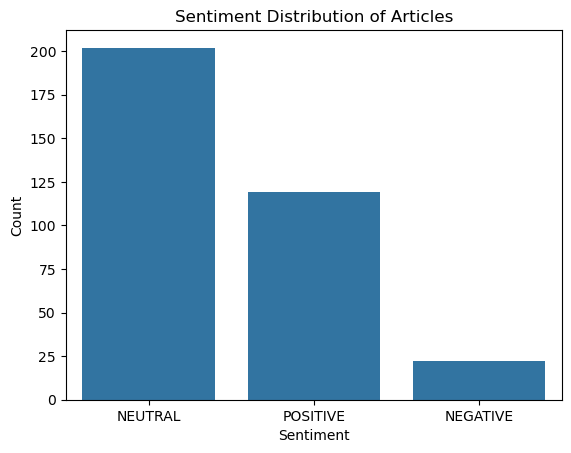

In [ ]:
# 감정 분포 시각화
sns.countplot(data=combined_df, x='sentiment')
plt.title('Sentiment Distribution of Articles')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [ ]:
combined_df = combined_df.sort_values(by='date')

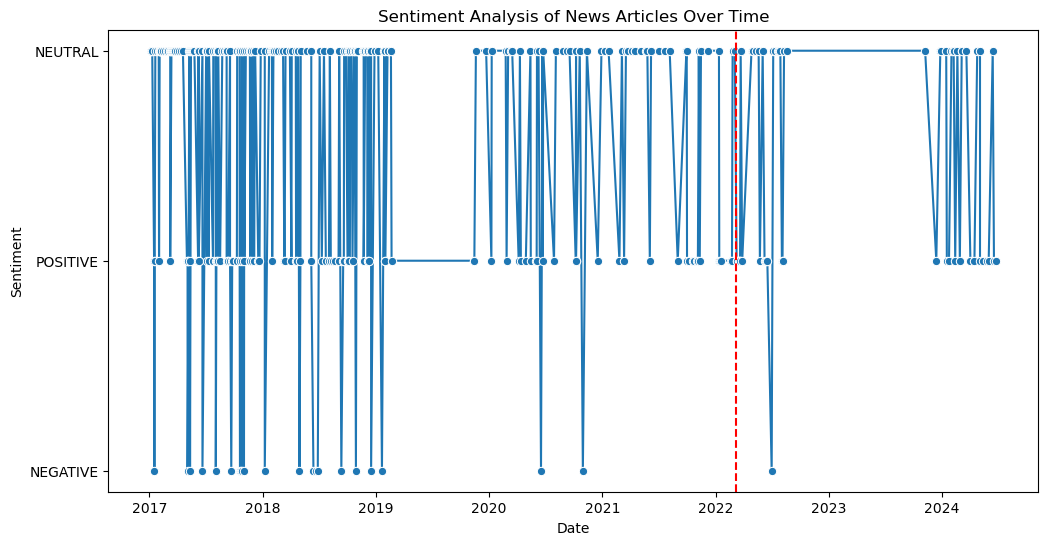

In [ ]:
# 그래프 그리기
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='sentiment', data=combined_df, estimator=None, marker='o')

# 그래프 제목 및 축 레이블
plt.title('Sentiment Analysis of News Articles Over Time')
plt.xlabel('Date')
plt.ylabel('Sentiment')

# 주요 사건 표시 (예시)
important_dates = ['2022-03-07']
for date in important_dates:
    plt.axvline(pd.to_datetime(date), color='r', linestyle='--')

plt.show()


In [ ]:
len(combined_df[(combined_df['date']>='2023-01-01')&(combined_df['date']<='2023-12-31')])

4

In [ ]:
combined_df[(combined_df['date']>='2017-01-01')&(combined_df['date']<='2017-12-31')]

,date,title,body,cleaned_body,sentiment,sentiment_score,sentiment_moving_avg
117,2017-01-05,"인도네시아, 니켈 원광 수출 금지 주목",금년 1월 12일부터 전면적으로 시행하게 되어 있는 인도네시아의 니켈 등 원광 수출...,금년 1월 12일부터 전면적으로 시행하게 되어 있는 인도네시아의 니켈 등 원광 수출...,NEUTRAL,0,NaN
116,2017-01-06,"LME 니켈 평균 가격, 12월에 1% 하락","LME 시장에서 2016년 12월 니켈 평균 가격이 현물 톤당 11,013.25불,...",LME 시장에서 2016년 12월 니켈 평균 가격이 현물 톤당 1101325불 3개...,NEUTRAL,0,NaN
115,2017-01-10,"인니 원광 수출 재개, 니켈 가격 압박",인도네시아가 곧 니켈 원광석 수출 금지 조치의 전면적 시행을 유예함으로써 니켈 가격...,인도네시아가 곧 니켈 원광석 수출 금지 조치의 전면적 시행을 유예함으로써 니켈 가격...,NEUTRAL,0,NaN
114,2017-01-16,"인니 원광 수출 재개, 니켈 가격 폭락",인도네시아가 니켈 원광석 수출이 가능하도록 법규를 개정할 것이라고 로이터 통신이 1...,인도네시아가 니켈 원광석 수출이 가능하도록 법규를 개정할 것이라고 로이터 통신이 1...,POSITIVE,1,NaN
113,2017-01-17,"인니 니켈광 수출 재개, 호주 업체 주가 폭락",인도네시아가 2014년부터 금지한 니켈 원광석의 수출을 다시 재개한다고 1월 13일...,인도네시아가 2014년부터 금지한 니켈 원광석의 수출을 다시 재개한다고 1월 13일...,NEGATIVE,-1,NaN
...,...,...,...,...,...,...,...
4,2017-12-07,"SHFE 니켈 가격, 톤당 11,000불로 하락","상하이 선물 거래소 (Shanghai Futures Exchange, SHFE)에서...",상하이 선물 거래소 Shanghai Futures Exchange SHFE에서 니켈...,NEUTRAL,0,0.200000
3,2017-12-08,"LME 니켈 가격, 톤당 1만1천불 아래로 하락",LME 니켈 가격이 계속 하락하여 톤당 1만1천불 아래로 미끄러짐. 12월 5일 L...,LME 니켈 가격이 계속 하락하여 톤당 1만1천불 아래로 미끄러짐 12월 5일 LM...,NEUTRAL,0,0.166667
2,2017-12-18,"Sherritt, Ambatovy 지분 축소 완료",캐나다 Sherritt International사는 마다가스카르 Ambatovy 니...,캐나다 Sherritt International사는 마다가스카르 Ambatovy 니...,POSITIVE,1,0.166667
1,2017-12-22,"필리핀, 캐나다 지속가능 개발 벤치마킹",필리핀 광업협회 (The Chamber of Mines of the Philippi...,필리핀 광업협회 The Chamber of Mines of the Philippin...,POSITIVE,1,0.166667


In [ ]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 343 entries, 117 to 320
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   date                  343 non-null    datetime64[ns]
 1   title                 343 non-null    object        
 2   body                  343 non-null    object        
 3   cleaned_body          343 non-null    object        
 4   sentiment             343 non-null    object        
 5   sentiment_score       343 non-null    int64         
 6   sentiment_moving_avg  337 non-null    float64       
 7   sentiment_t           343 non-null    object        
 8   cleaned_title         343 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 26.8+ KB


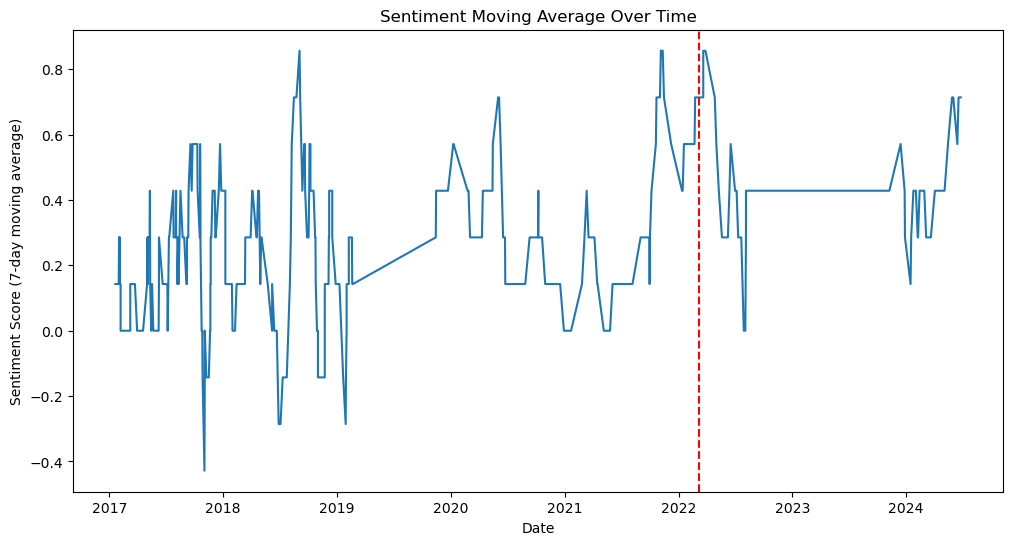

In [ ]:


# 감정 점수의 이동 평균 계산
combined_df['sentiment_moving_avg'] = combined_df['sentiment_score'].rolling(window=7).mean()

plt.figure(figsize=(12, 6))
plt.plot(combined_df['date'], combined_df['sentiment_moving_avg'])
plt.title('Sentiment Moving Average Over Time')
plt.xlabel('Date')
plt.ylabel('Sentiment Score (7-day moving average)')

# 주요 사건 표시
important_dates = ['2022-03-07']
for date in important_dates:
    plt.axvline(pd.to_datetime(date), color='r', linestyle='--')

plt.show()



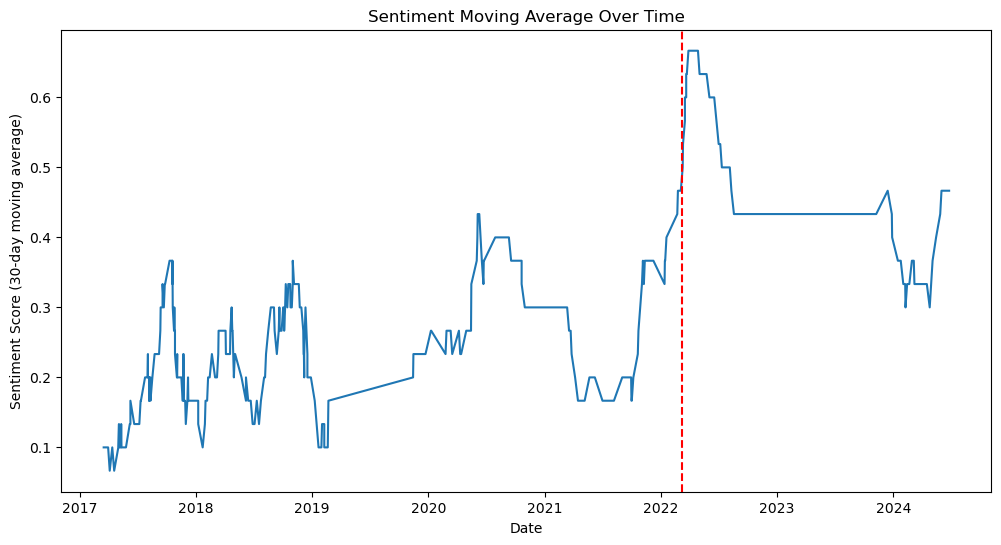

In [ ]:


# 감정 점수의 이동 평균 계산
combined_df['sentiment_moving_avg'] = combined_df['sentiment_score'].rolling(window=30).mean()

plt.figure(figsize=(12, 6))
plt.plot(combined_df['date'], combined_df['sentiment_moving_avg'])
plt.title('Sentiment Moving Average Over Time')
plt.xlabel('Date')
plt.ylabel('Sentiment Score (30-day moving average)')

# 주요 사건 표시
important_dates = ['2022-03-07']
for date in important_dates:
    plt.axvline(pd.to_datetime(date), color='r', linestyle='--')

plt.show()

